In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [74]:
df = pd.read_csv("HR_comma_sep.csv")

In [75]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data exploration and visualization:

In [76]:
df.shape

(14999, 10)

In [77]:
left = df[df["left"]==1]
left.shape

(3571, 10)

In [78]:
retained = df[df["left"]==0]
retained.shape

(11428, 10)

In [79]:
df.groupby("left").mean()

C:\Users\abc\AppData\Local\Temp\ipykernel_2092\189522867.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("left").mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary', ylabel='left'>

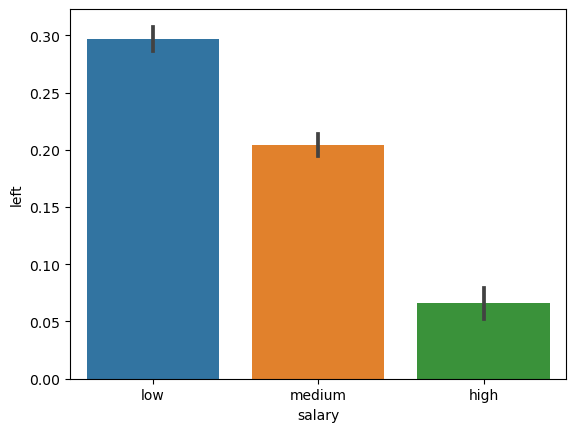

In [80]:
sns.barplot(x = "salary",y = "left",data = df )

<Axes: xlabel='Department'>

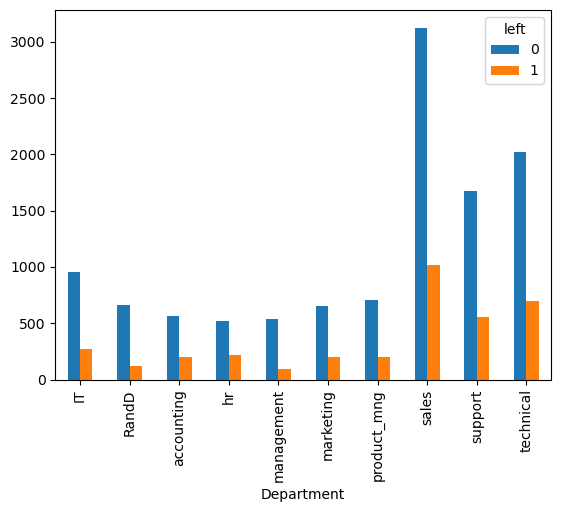

In [82]:
pd.crosstab(df.Department,df.left).plot(kind ="bar")

# Independent variables and dependent varaiables

In [24]:
# 1 satisfaction_level
#2 average_montly_hours
#3 promotion_last_5years
#4 salary

In [83]:
df1 = df[["satisfaction_level","average_montly_hours","promotion_last_5years","salary"]]

In [84]:
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [85]:
dummies = pd.get_dummies(df1["salary"])

In [86]:
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [87]:
merged = pd.concat([df1,dummies],axis = "columns")

In [88]:
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [89]:
x = merged.drop(["salary","low"],axis ="columns")

In [90]:
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,medium
0,0.38,157,0,0,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,0,0
4,0.37,159,0,0,0
...,...,...,...,...,...
14994,0.40,151,0,0,0
14995,0.37,160,0,0,0
14996,0.37,143,0,0,0
14997,0.11,280,0,0,0


In [91]:
y = df.left

In [92]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [96]:
len(x_train)

10499

In [97]:
len(x_test)

4500

In [98]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [99]:
model.fit(x_train,y_train)

LogisticRegression()

In [1]:
model.predict(x_test)

NameError: name 'model' is not defined